# Census Income prediction

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics)

In [1]:
#data visulaisation and manipulation
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#importing the necessary modelling algos 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('census_income.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


checking dataset

In [4]:
df.shape

(32560, 15)

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

now, before any ananlysis make target column income into numerical class

In [7]:
labelEncoder=LabelEncoder()
df['Income']=labelEncoder.fit_transform(df['Income'])

In [8]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


# EDA and Data Processing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


there are no missing value in data set

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211319E1E50>,
      dtype=object)

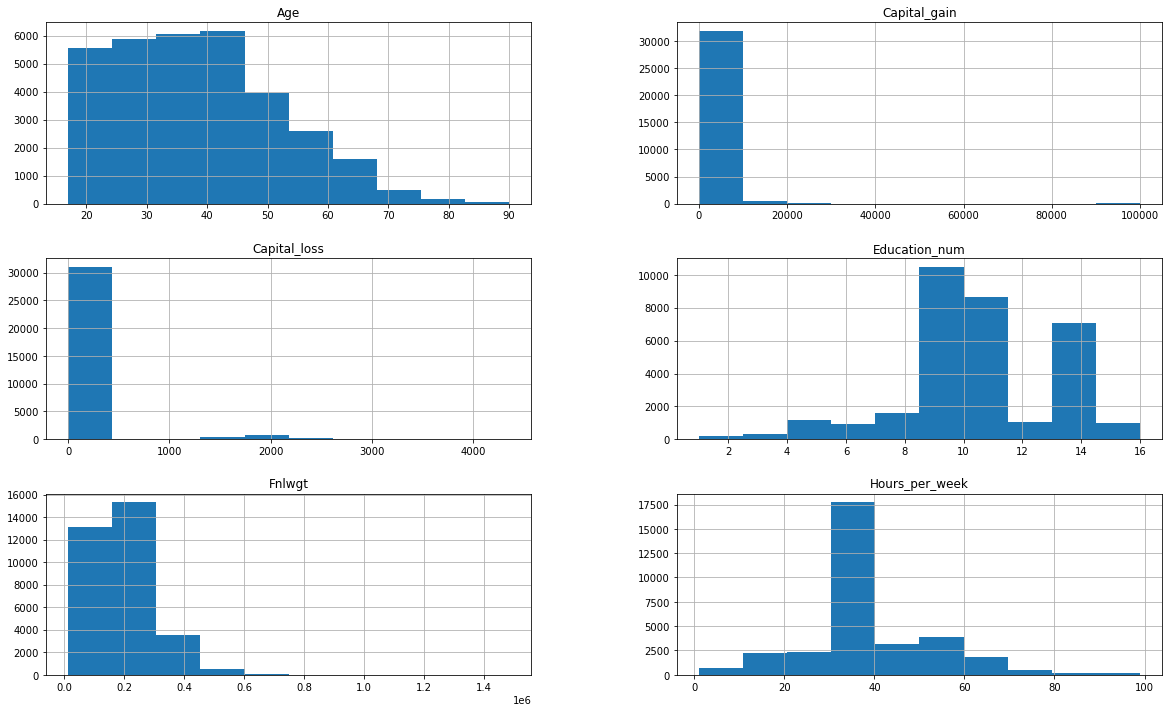

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize']=20,12
df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].hist()

from above:

Group the age column into bins


for capital gain/loass the data is highly skewed


fnlwgt is also left skewed

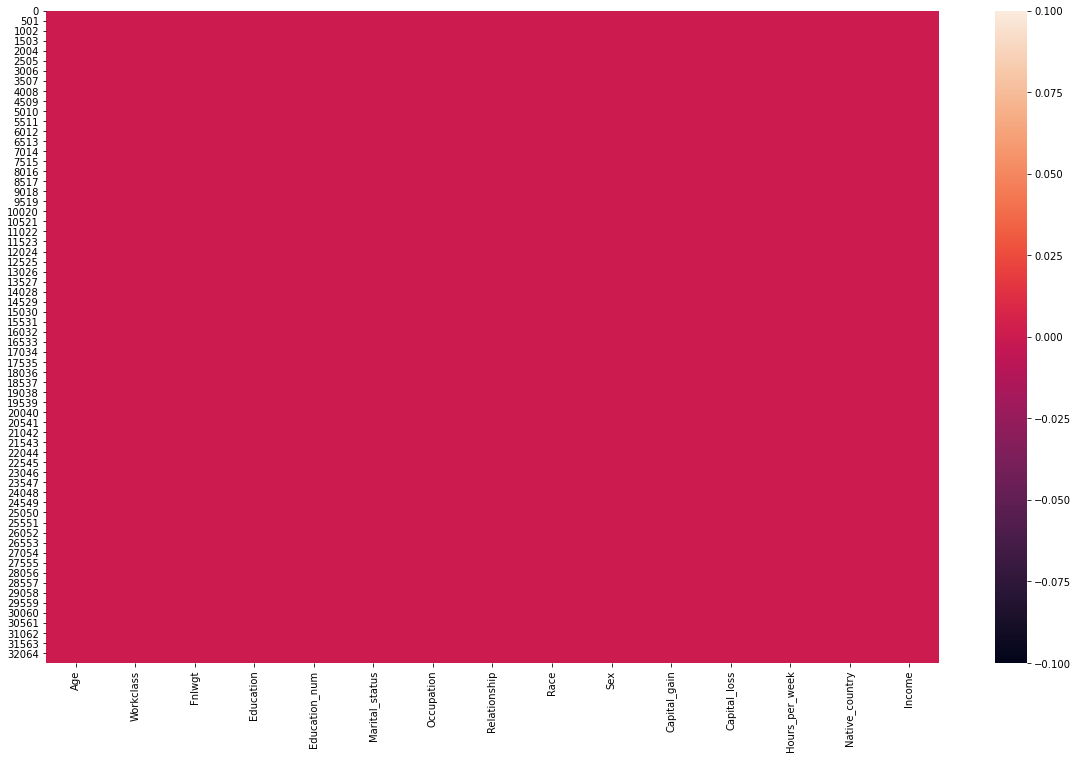

In [11]:
sns.heatmap(df.isnull())

as shown above no null values is there

In [12]:
#mutltivariate analysis
df_corr=df.corr()
df_corr

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


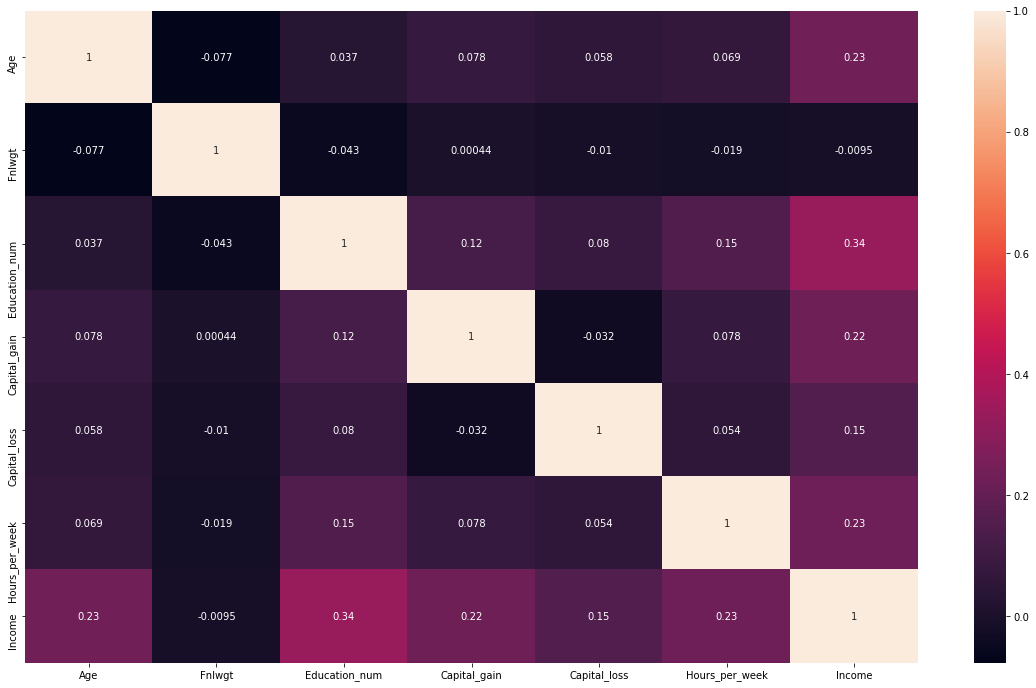

In [13]:
sns.heatmap(df_corr,annot=True)

Taking a look at the correlation matrix above, it's clear that there is not a very high linear correlation between any of the continuous features and the target variable. Also, Final Weight has zero correlation with the output class and hence, I'll drop this column later

Age is having diffrent categories i.e.

1. 0-25Young

2. 25-50Adult

3. 50-100 old

In [14]:
df['Age']=pd.cut(df['Age'],bins=[0,25,50,100],labels=['Young','Adult','Old'])

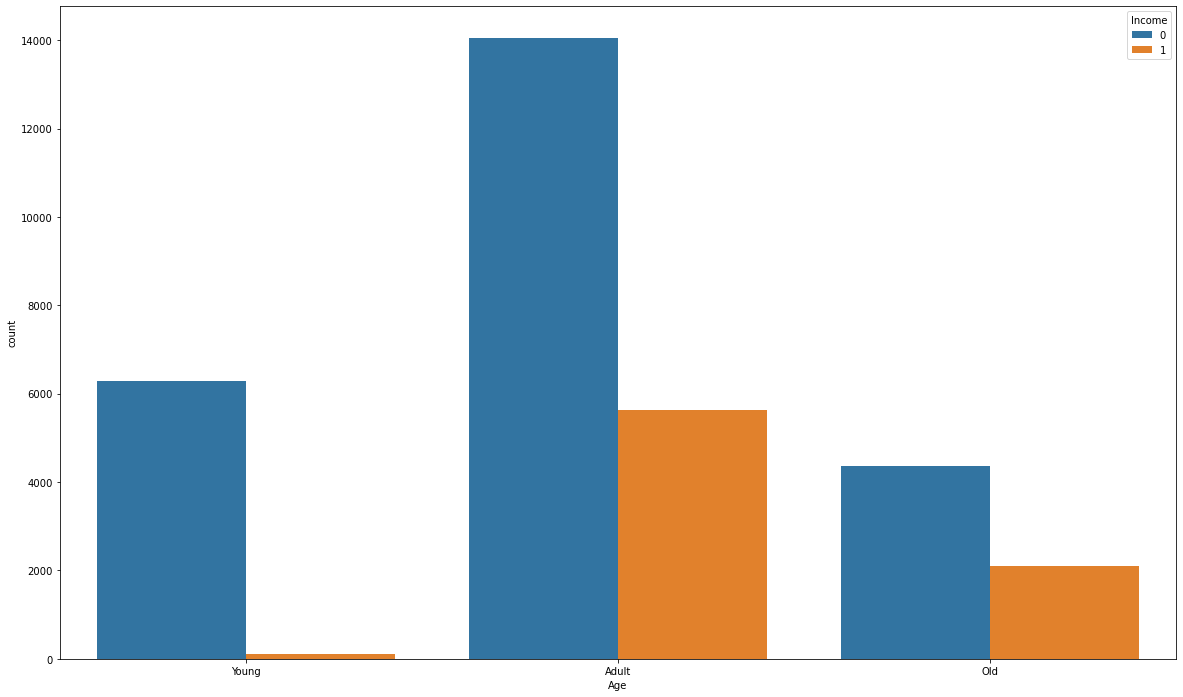

In [15]:
sns.countplot(x='Age',hue='Income',data=df)

it appears that there are relatively less young people who have an income more than $50K

In [16]:
df['Capital Difference']=df['Capital_gain']-df['Capital_loss']
df.drop(['Capital_gain'],axis=1,inplace=True)
df.drop(['Capital_loss'],axis=1,inplace=True)

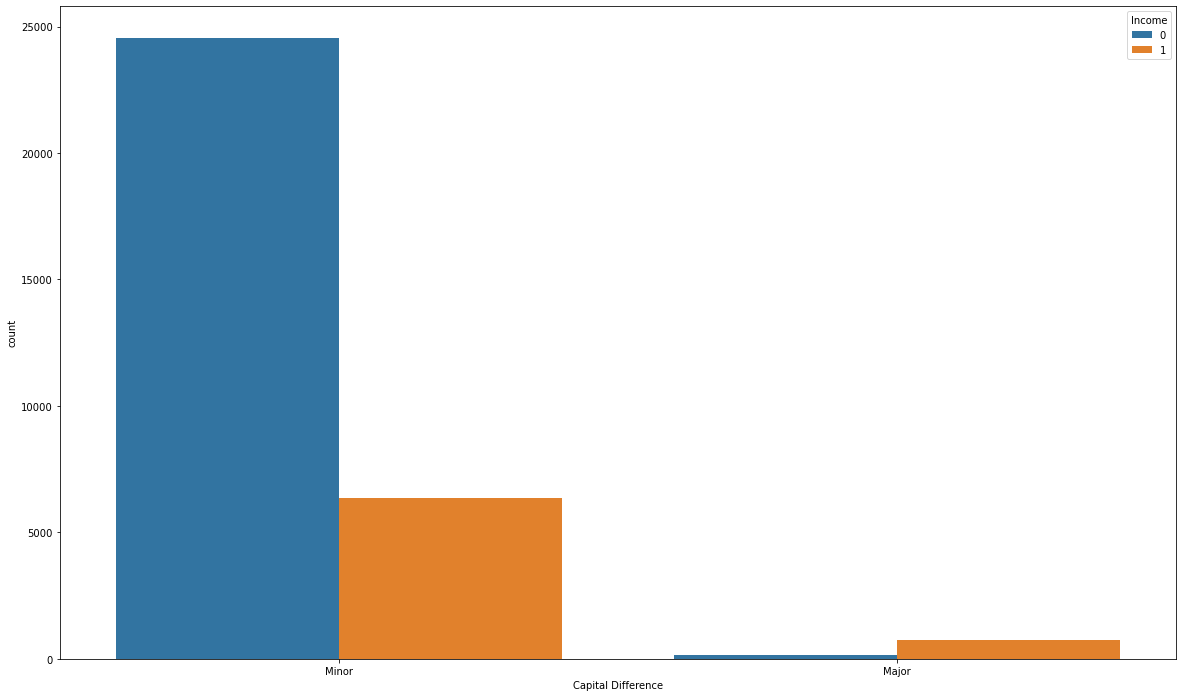

In [17]:
df['Capital Difference']=pd.cut(df['Capital Difference'],bins=[-5000,5000,10000],labels=['Minor','Major'])
sns.countplot(x='Capital Difference',hue='Income',data=df)

dropping the final weight because it has no correlated values to other columns

In [18]:
df['Final Weight']=df['Fnlwgt']
df.drop('Fnlwgt',axis=1,inplace=True)

In [19]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Capital Difference,Final Weight
0,Adult,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,Minor,83311
1,Adult,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,Minor,215646
2,Old,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,Minor,234721
3,Adult,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,Minor,338409
4,Adult,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0,Minor,284582


#Hours per week

As shown in above histograms for Hours per week I can see that the datasetsis alignes around the corner and bucket can be created so usually the work hours areclose to 30-40 hours so making the bucket/bins of 0-30,30-40 and 40-100 

In [20]:
df['Hours_per_week']=pd.cut(df['Hours_per_week'],bins=[0,30,40,100],labels=['Lesser hours','Normal Hours','Extra hours'])

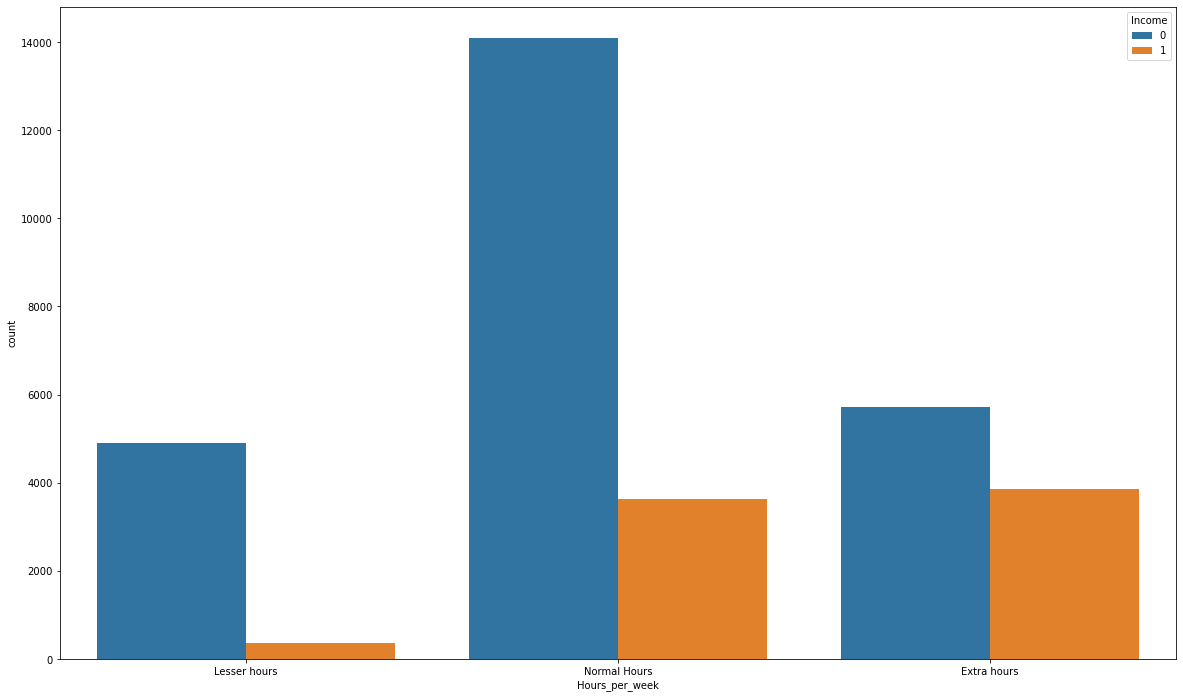

In [21]:
sns.countplot(x='Hours_per_week',hue='Income',data=df)

as shown in above the number of hours increases the number of people earninngs more than $50K 

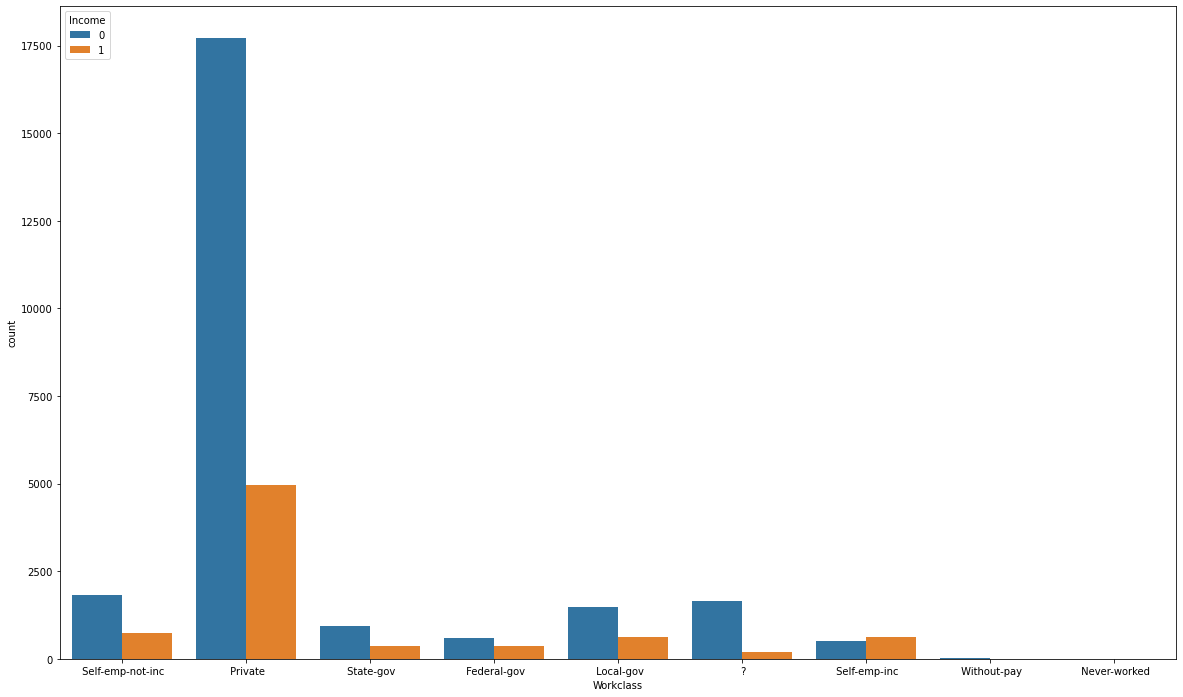

In [22]:
sns.countplot(x='Workclass',hue='Income',data=df)

Taking a look at the plot above can be seen that there are Work Class values defined as ? which appears to be error data. As it is very less,then simply remove these records. Also, the two values Without-pay and Never-worked are negligible and hence it is safe to drop them too

In [23]:
df=df.drop(df[df['Workclass']=='?'].index)
df=df.drop(df[df['Workclass']=='Without-pay'].index)
df=df.drop(df[df['Workclass']=='Never-worked'].index)


Education and education num

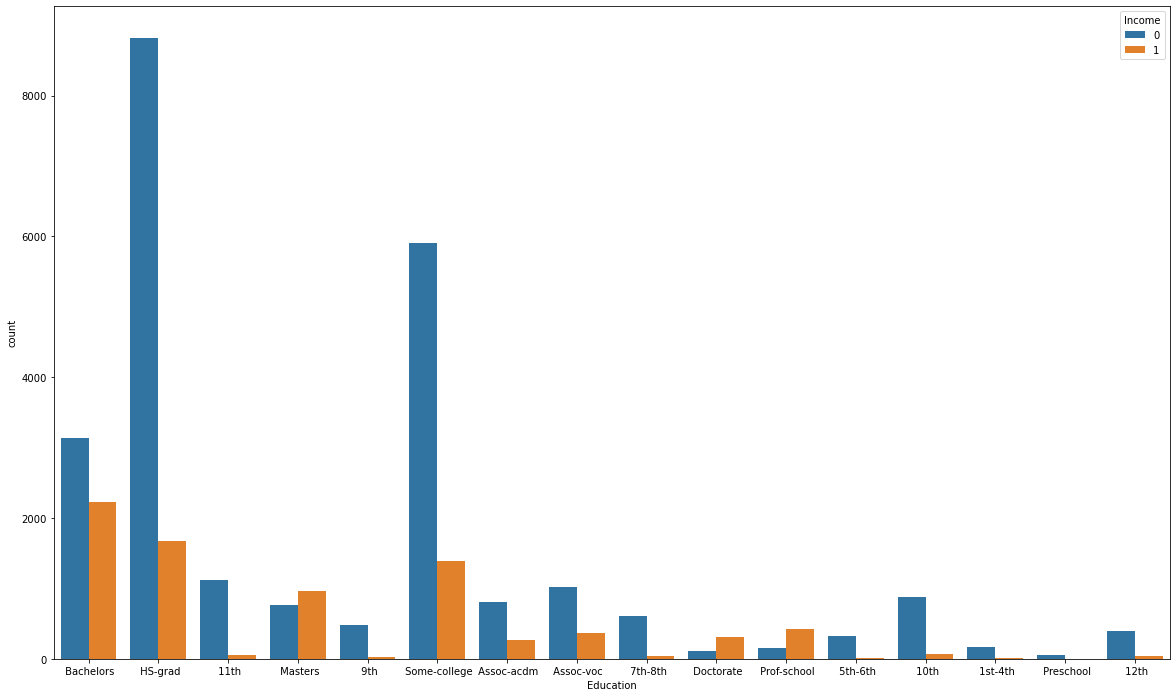

In [24]:
sns.countplot(x='Education',hue='Income',data=df)

In [25]:
education_class=df['Education'].unique()
for edu_class in education_class:
    print("FOR{}, The Education Number is{}".format(edu_class,df[df['Education']==edu_class]['Education_num'].unique()))
    

FOR Bachelors, The Education Number is[13]
FOR HS-grad, The Education Number is[9]
FOR 11th, The Education Number is[7]
FOR Masters, The Education Number is[14]
FOR 9th, The Education Number is[5]
FOR Some-college, The Education Number is[10]
FOR Assoc-acdm, The Education Number is[12]
FOR Assoc-voc, The Education Number is[11]
FOR 7th-8th, The Education Number is[4]
FOR Doctorate, The Education Number is[16]
FOR Prof-school, The Education Number is[15]
FOR 5th-6th, The Education Number is[3]
FOR 10th, The Education Number is[6]
FOR 1st-4th, The Education Number is[2]
FOR Preschool, The Education Number is[1]
FOR 12th, The Education Number is[8]


so,above the Education num and Education are jusst same so we can drop any one of them and can combine all information from Preschool to 12th  as they can be considerd of one class who have no college/university level education

In [26]:
df.drop(['Education_num'],axis=1,inplace=True)
df['Education'].replace(['11th','9th','7-8th','5-6th','10th','1st-4th','Preschool','12th'],'School',inplace=True)
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

Marital status and relationship

In [27]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

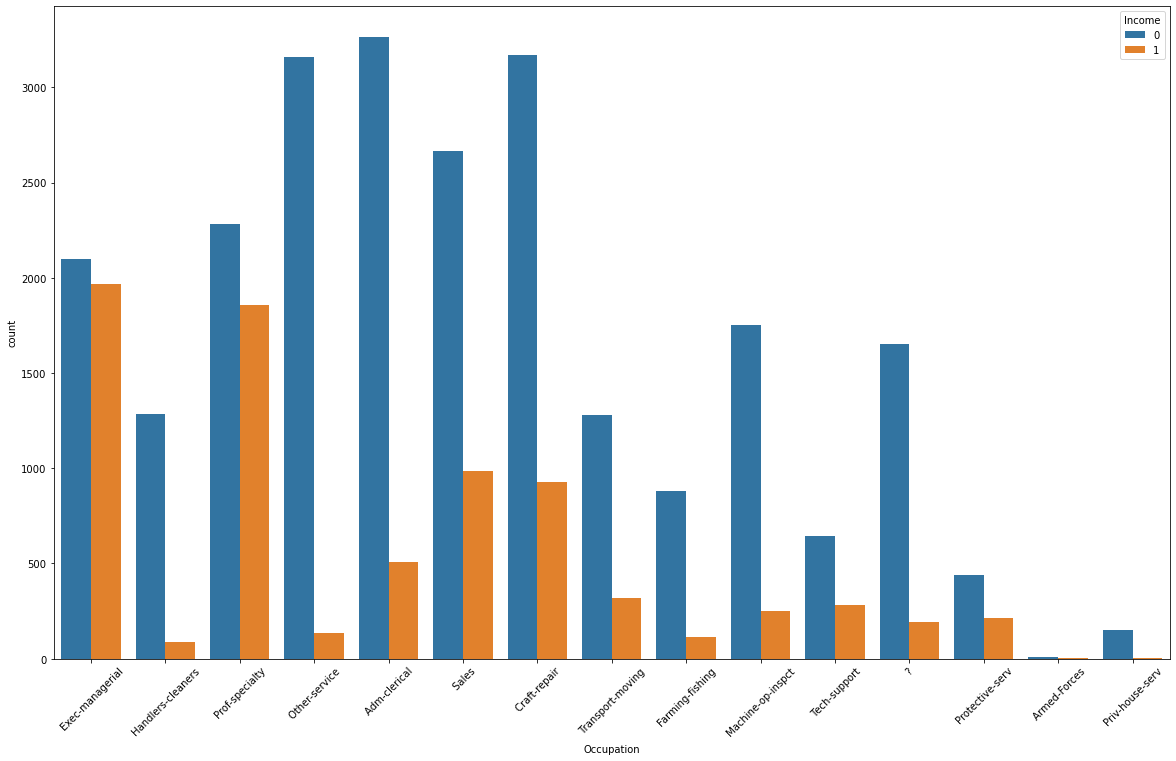

In [28]:
plt.xticks(rotation=45)
sns.countplot(x='Occupation',hue='Income',data=df)

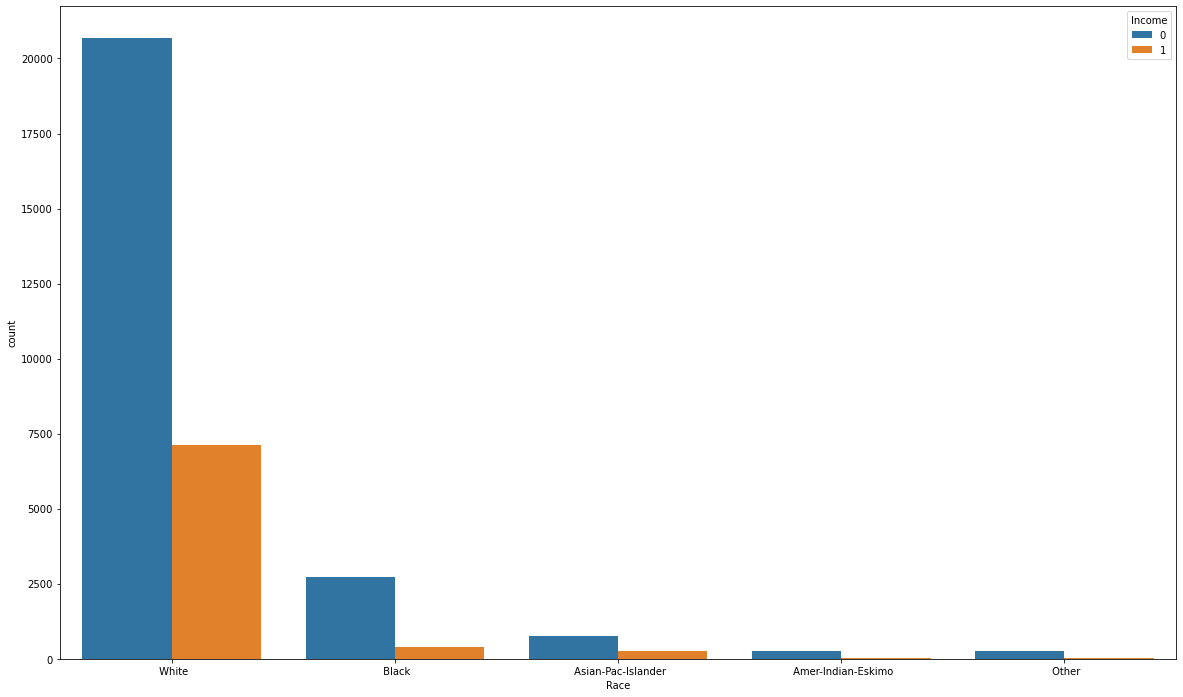

In [29]:
sns.countplot(x='Race',hue='Income',data=df)

In [30]:
df['Race'].unique()
df['Race'].replace(['Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'],'Other',inplace=True)

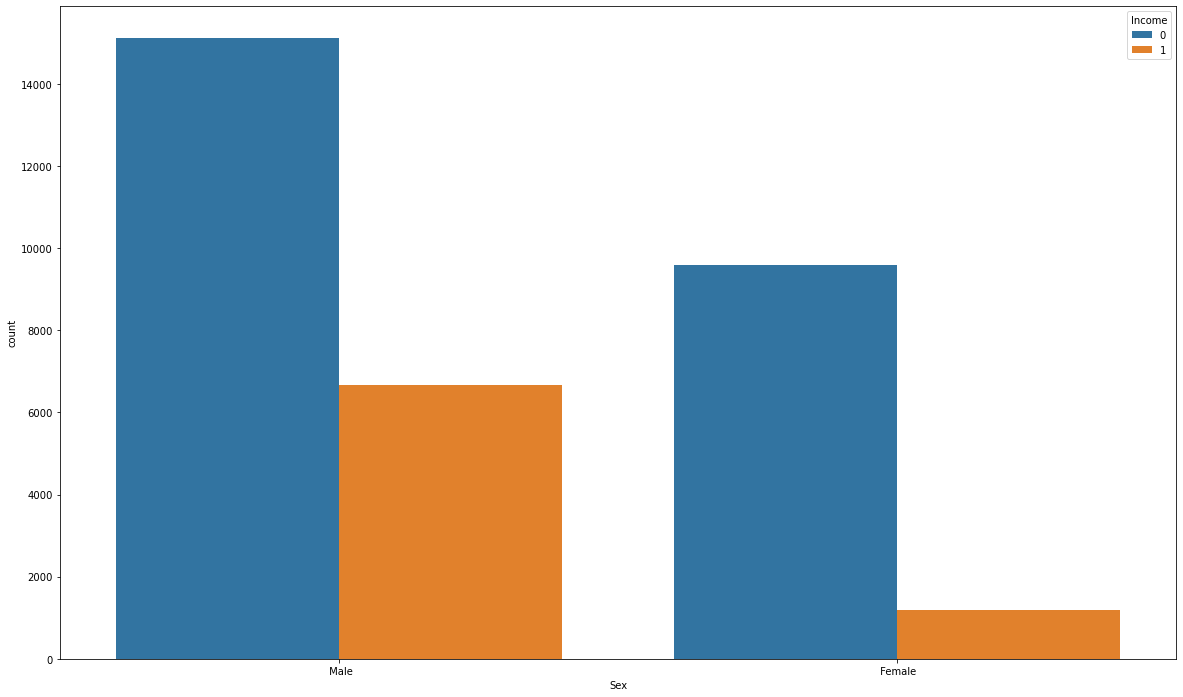

In [31]:
sns.countplot(x='Sex',hue='Income',data=df)

from above

there are more male participant than female participant

more percentage of males have an income of more than $50K than females

In [32]:
country_count=df['Native_country'].value_counts()
country_count

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Text(0.5, 1.0, 'Total adults from Each Country')

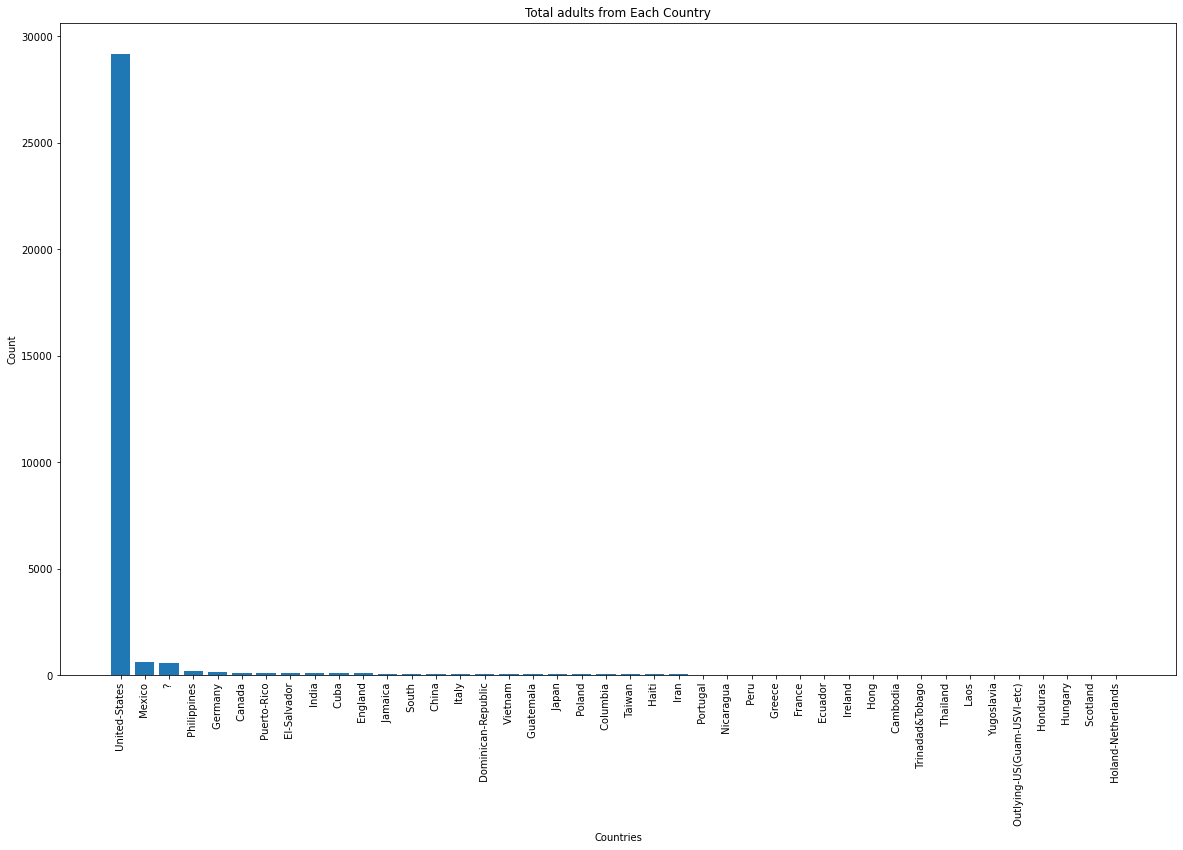

In [33]:
plt.bar(country_count.index,country_count.values)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from Each Country')

In [34]:
#dropping the contry columns denoted by ? by analysing above 
df=df.drop(df[df['Native_country']== '?'].index)

In [35]:
countries=np.array(df['Native_country'].unique())
countries=np.delete(countries,0)

In [36]:
df['Native_country'].replace(countries,'Other',inplace=True)

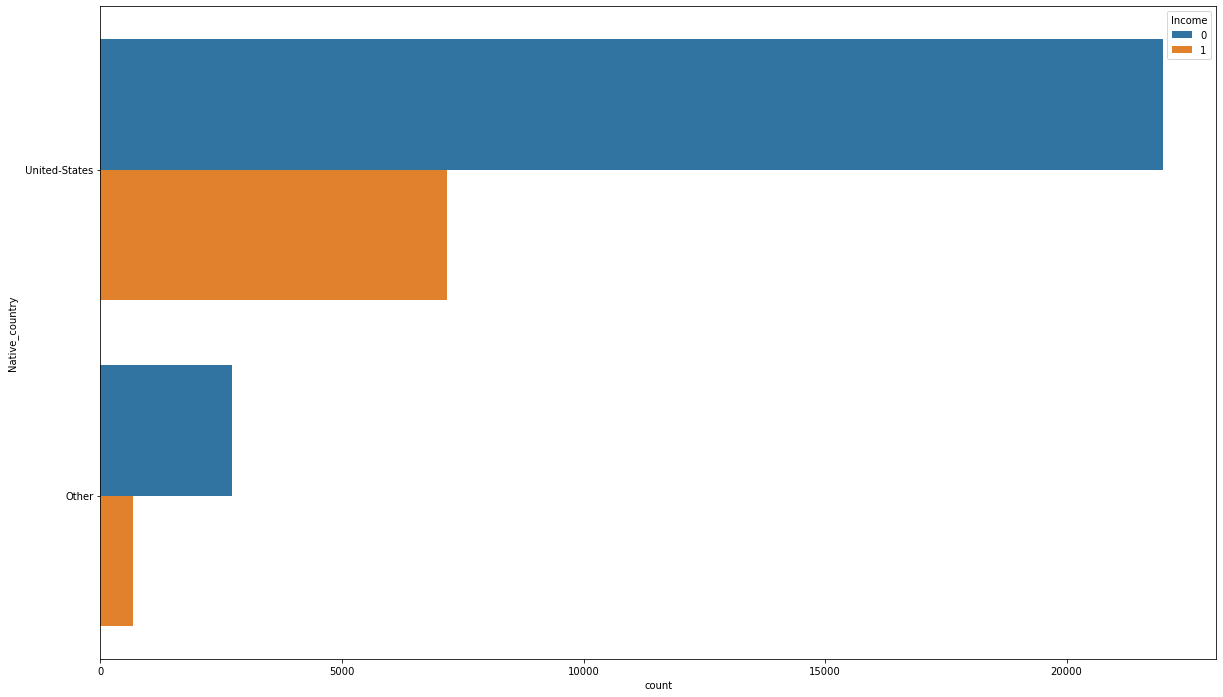

In [37]:
sns.countplot(y='Native_country',hue='Income',data=df)

# Data Manipulation

In [38]:
#out if this making columns values numerical
#and use dummies method of pandas to get seprate columns
y=df['Income']
x=df.drop(['Income'],axis=1)
x=pd.get_dummies(x)
print("Total features: {}".format(x.shape[1]))

Total features: 71


# Featuring the data

In [39]:
#finding the best random state
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(10,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred_y=mod.predict(x_test)
    temp_accu=r2_score(y_test,pred_y)
    if temp_accu>accu:
        accu=temp_accu
        best_r_state=i
        
print(f"best random state is :{best_r_state}")

best random state is :0


In [40]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

# Applying Models

In [41]:
classifiers=[GaussianNB(),
             SVC(kernel='rbf',probability=True),
             DecisionTreeClassifier(random_state=0),
             RandomForestClassifier(n_estimators=100,random_state=0),
             GradientBoostingClassifier(random_state=0)]
classifier_names=["Gaussian Naive Byes",
                 "Support Vector Classifier",
                 "Decision Tree Classifier",
                 "Random Forest Classifier",
                 "Gradient Boosting Classifier"]
accuracies=[]

In [42]:
for i in range(len(classifiers)):
    classifier=classifiers[i]
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    print("{}:".format(classifier_names[i]))
    print("F1 Score:{:.2f}".format(f1_score(y_test,y_pred)))
    accuracy=accuracy_score(y_test,y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Byes:
F1 Score:0.00
Support Vector Classifier:
F1 Score:0.00
Decision Tree Classifier:
F1 Score:0.57
Random Forest Classifier:
F1 Score:0.62
Gradient Boosting Classifier:
F1 Score:0.63


from above the GradientBoostingClassifier Performed the best with F1 Score of 0.65

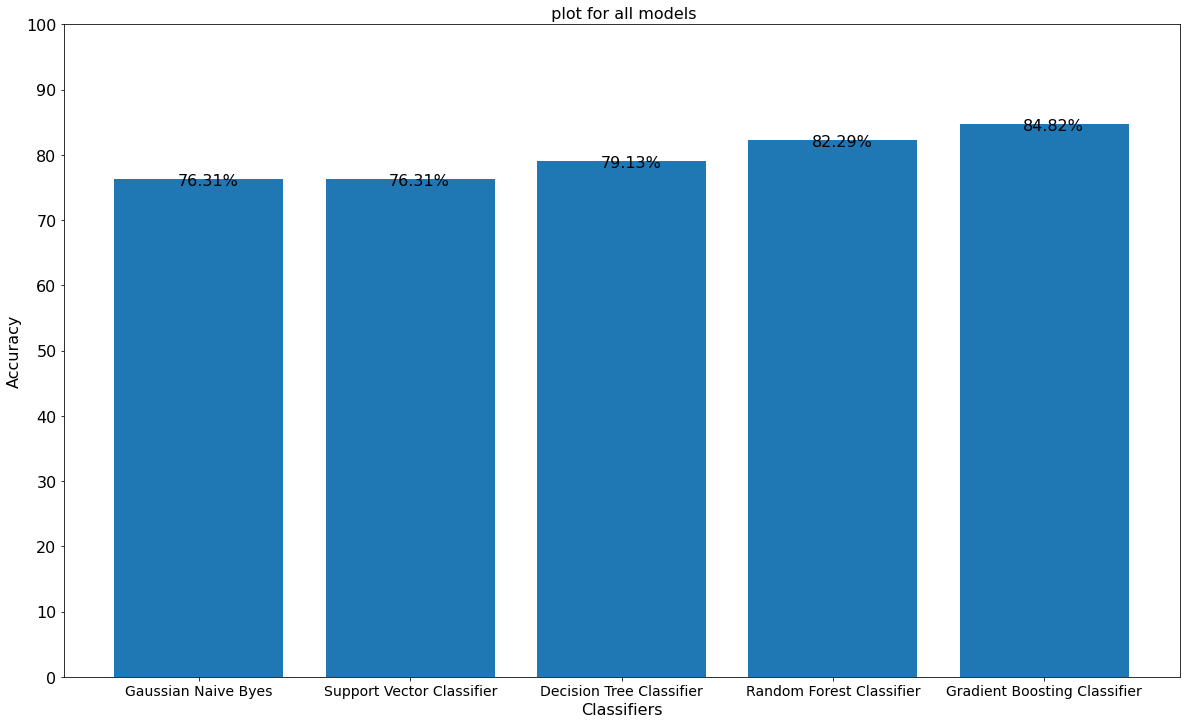

In [45]:
from matplotlib.cm import rainbow
plt.figure(figsize=(20,12))
col=rainbow(np.linspace(0,1,len(classifiers)))
barplot=plt.bar(classifier_names,accuracies)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontsize=16)
plt.xticks(fontsize=14)
plt.xlabel("Classifiers",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.title(" plot for all models",fontsize=16)
for i,bar in enumerate(barplot):
    plt.text(bar.get_x()+bar.get_width()/2-0.1,
            bar.get_height()-1.02,
            s='{:.2f}%'.format(accuracies[i]),
            fontsize=16)

from above Gradient Bosting Classifier had the best accuracy

# ROC Curve

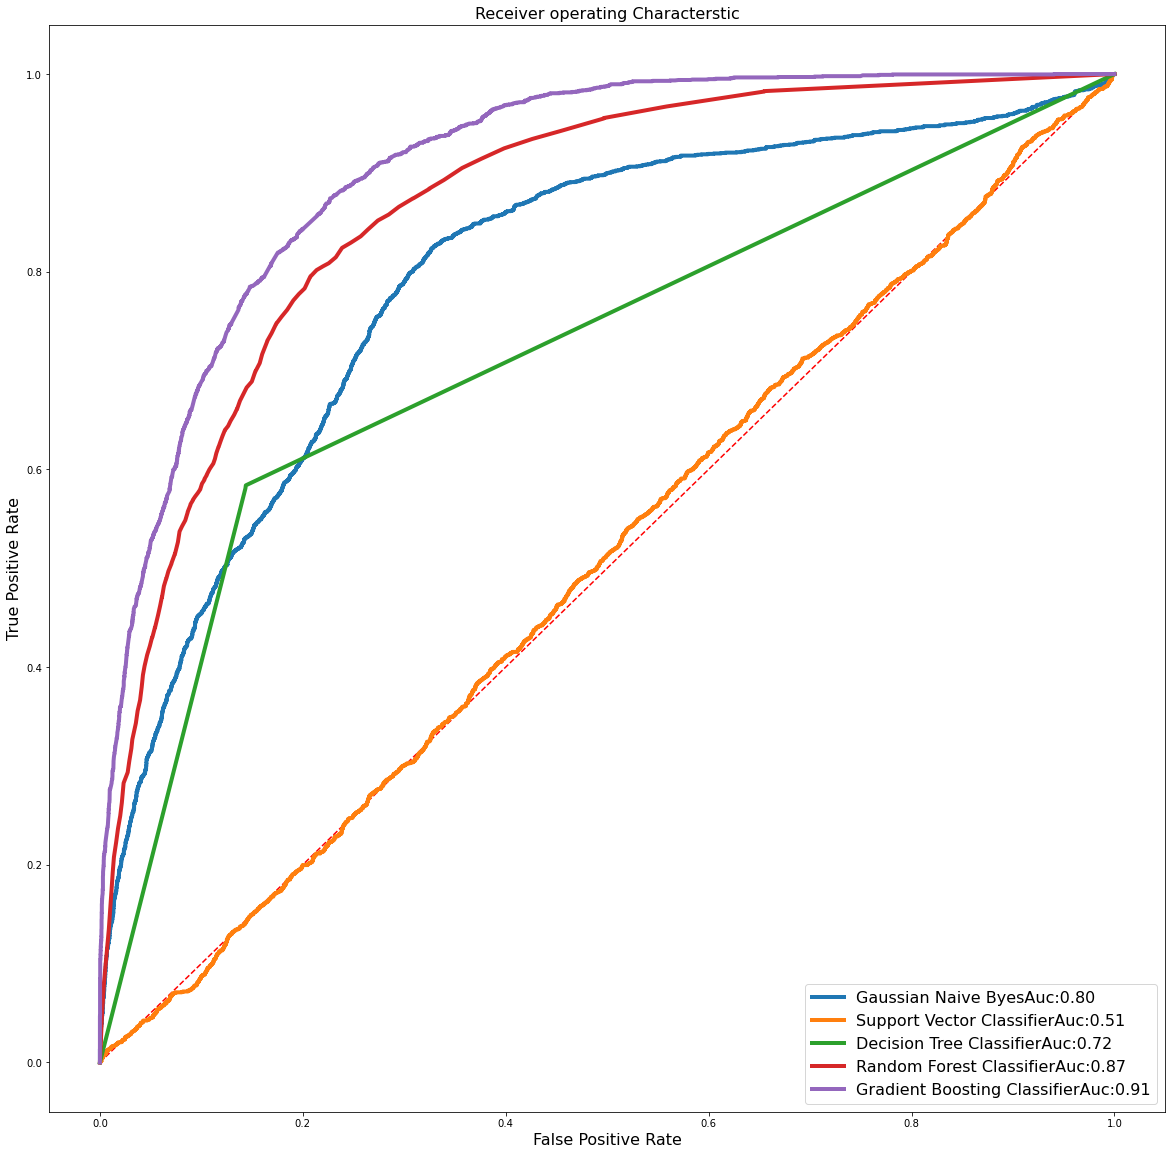

In [52]:
#analysing the ROC curve for the prediction for income more than $50K
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(20,20))
plt.plot([0,1],[0,1],'r--')

for i in range(len(classifiers)):
    classifier=classifiers[i]
    probs=classifier.predict_proba(x_test)
    probs=probs[:, 1]
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    label=classifier_names[i]+'Auc:'+'{0:.2f}'.format(roc_auc)
    plt.plot(fpr,tpr,label=label,linewidth=4)
    
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Receiver operating Characterstic',fontsize=16)
plt.legend(loc='lower rate',fontsize=16)
    

# again GradientBoostingClassifier IS best performing model